In [ ]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[18439, -24426, -66], [17593, -18459, 1530], [16799, -2399, 12375], [18972, 17545, 19345], [19010, 27945, 11632], [14558, 21964, -7770], [13722, -11681, -15383], [17493, -21619, -4932], [18743, -24620, 296], [17467, -17527, 1202], [16909, -922, 13031], [19128, 18437, 20105], [18969, 27464, 10878], [13982, 21284, -9449], [10631, 3801, -18901], [14718, -12733, -13389], [18577, -24810, 33], [17059, -16669, 1765], [16983, 1746, 14525], [19801, 21197, 19686], [18110, 28366, 7602], [13270, 19140, -11506], [11259, 979, -17810], [15254, -15443, -12872], [17828, -22972, -3118], [18207, -24322, 3355], [17325, 4856, 15532], [19509, 23224, 18104], [18060, 27415, 5672], [12901, 17015, -13403], [10962, -796, -18910], [15950, -16980, -10624], [18115, -23304, -2394], [18382, -23085, 532], [16780, -12328, 4195], [19985, 24590, 19375], [16628, 26910, 2083], [11981, 13893, -15638], [11686, -3854, -17990], [16585, -18745, -8951], [18665, -24508, -918], [17661, -21873, -690], [16933, -9339, 7148], [18145,

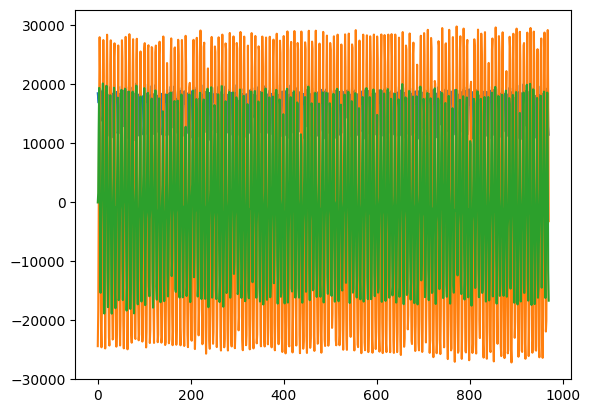

In [ ]:
RutaFile="/content/drive/MyDrive/pruebas/Training/No lubrication.json.5cdkuekr.ingestion-7689984996-rpt7l.json"
dataframe = pd.read_json(RutaFile)
#print(dataframe.to_string())
Valores = dataframe.iloc[:,:].values
#print(Valores.shape)
#print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd


directory = '/content/drive/MyDrive/pruebas/Training/'


files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

num_classes = 5
files_per_class = cantidadFiles // num_classes

sequence_length = 64
sequence_stride = 10


all_spectral_features = []
all_labels = []

def extract_spectral_features(data, fs=49):
    features = []
    for axis_data in data.T:
        fft_result = np.fft.fft(axis_data)
        freqs = np.fft.fftfreq(len(axis_data), 1/fs)
        magnitude = np.abs(fft_result)
        positive_freqs = freqs[:len(freqs)//2]
        positive_magnitude = magnitude[:len(magnitude)//2]
        dominant_freq = positive_freqs[np.argmax(positive_magnitude)]
        total_energy = np.sum(positive_magnitude**2)
        low_band = np.sum(positive_magnitude[(positive_freqs < 10)]**2)
        mid_band = np.sum(positive_magnitude[(positive_freqs >= 10) & (positive_freqs < 20)]**2)
        high_band = np.sum(positive_magnitude[(positive_freqs >= 20)]**2)
        mean_amplitude = np.mean(positive_magnitude)
        std_amplitude = np.std(positive_magnitude)
        features.append([dominant_freq, total_energy, low_band, mid_band, high_band, mean_amplitude, std_amplitude])
    return np.concatenate(features)


for idx, file in enumerate(files):
    RutaFile = os.path.join(directory, file)

    dataframe = pd.read_json(RutaFile)
    Valores = dataframe.iloc[:, :].values
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)


    Datos = DatosOriNP[0:970]
    Datos = Datos.reshape(-1, 3)


    current_class = idx // files_per_class


    dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=Datos,
        targets=None,
        sequence_length=sequence_length,
        sequence_stride=sequence_stride,
        batch_size=32,
    )


    X_windows = np.concatenate([x.numpy() for x in dataset], axis=0)


    n_samples, _, n_axes = X_windows.shape
    spectral_features = np.zeros((n_samples, 7 * n_axes))
    for i in range(n_samples):
        spectral_features[i, :] = extract_spectral_features(X_windows[i])

    labels = np.full((n_samples,), current_class)

    all_spectral_features.append(spectral_features)
    all_labels.append(labels)

all_spectral_features = np.vstack(all_spectral_features)
all_labels = np.concatenate(all_labels)





Forma de las ventanas: (9555, 64, 3)
Forma de las etiquetas: (9555,)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 3)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64, 32)         │            128 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 64, 32)         │          8,416 │ dense[0][0],           │
│ (MultiHeadAttention)      │                        │                │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 64, 32)         │             64 │ multi_head_attention[… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 32)             │              0 │ layer_normalization[0… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │          1,056 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 5)              │            165 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,829 (38.39 KB)

 Trainable params: 9,829 (38.39 KB)

 Non-trainable params: 0 (0.00 B)

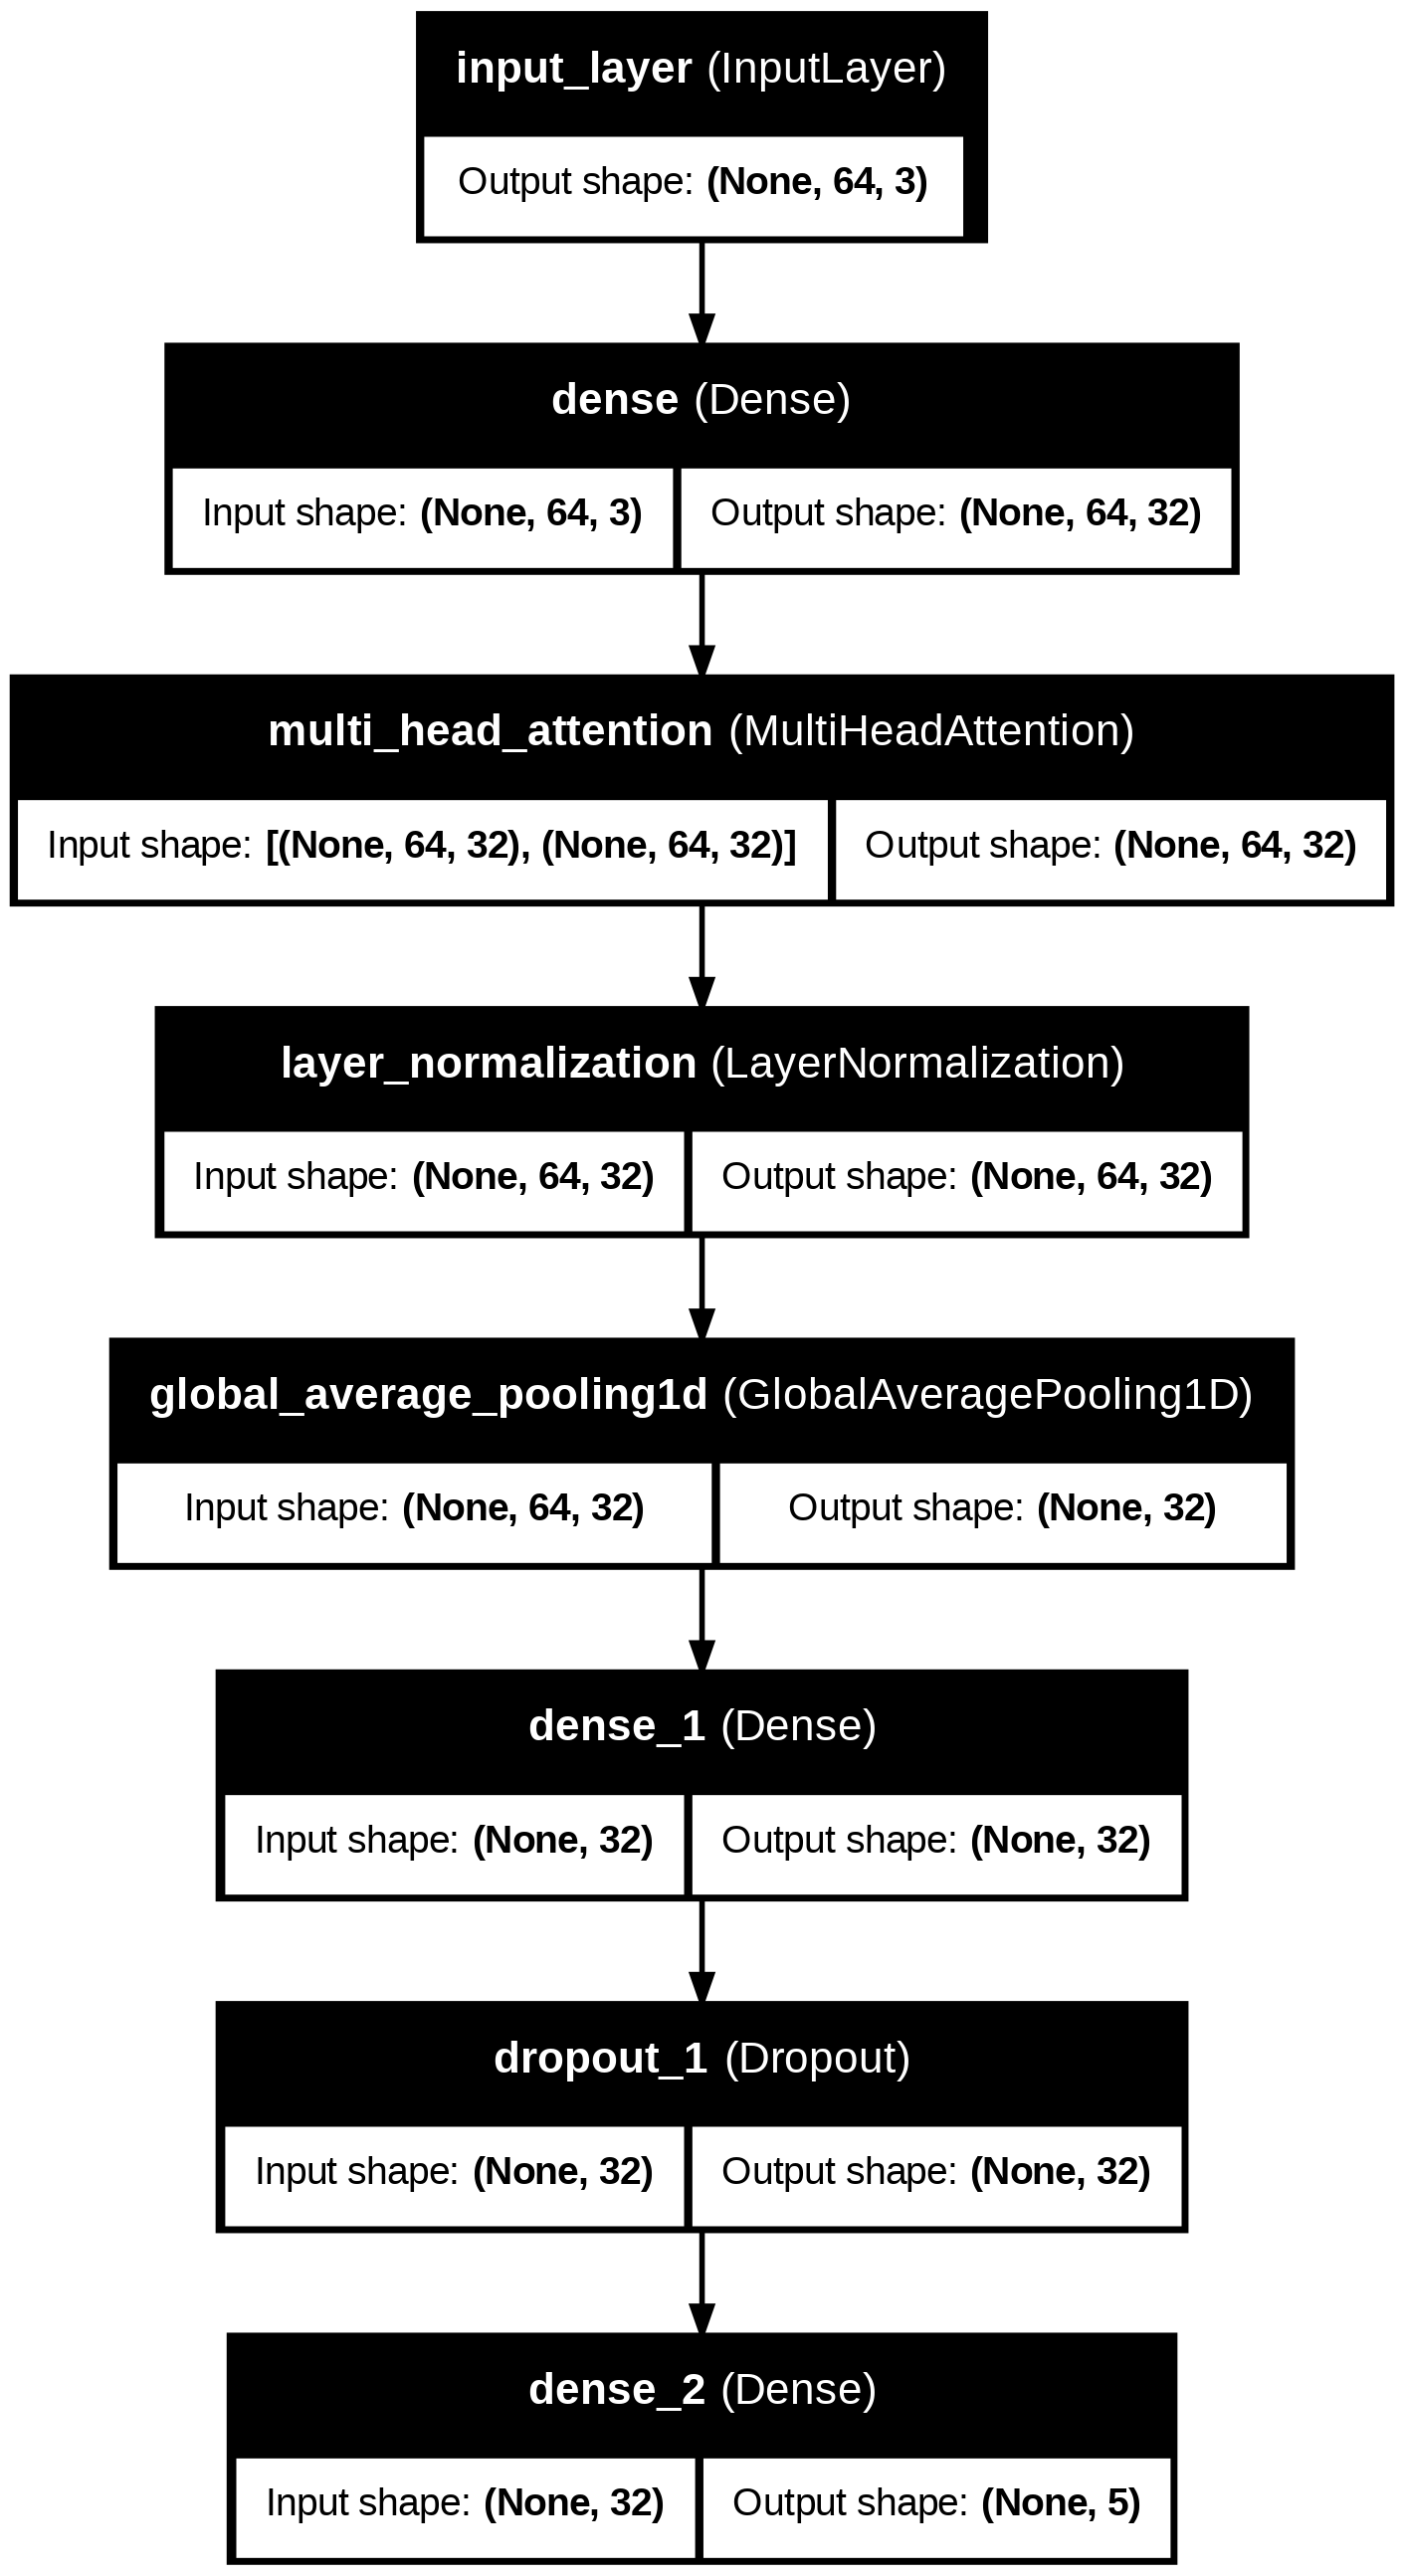

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D

num_heads = 2
embedding_dim = 32


inputs = Input(shape=(64, 3))

x = Dense(embedding_dim)(inputs)
x = MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)(x, x)
x = LayerNormalization(epsilon=1e-6)(x)

x = GlobalAveragePooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)


modelo_transformer = Model(inputs, outputs)
modelo_transformer.summary()

modelo_transformer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

keras.utils.plot_model(modelo_transformer, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    all_windows, labelsN, test_size=0.20, random_state=42
)



In [ ]:
historia = modelo_transformer.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=30, batch_size=32)

Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5171 - loss: 1.1151 - val_accuracy: 0.7630 - val_loss: 0.6039
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7227 - loss: 0.6534 - val_accuracy: 0.9597 - val_loss: 0.2946
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8313 - loss: 0.4561 - val_accuracy: 0.9754 - val_loss: 0.1425
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8883 - loss: 0.3246 - val_accuracy: 0.9461 - val_loss: 0.2018
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8766 - loss: 0.3559 - val_accuracy: 0.9513 - val_loss: 0.1708
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.8406 - loss: 0.4229 - val_accuracy: 0.8069 - val_loss: 0.4062
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7880 - loss: 0.5319 - val_accuracy: 0.9069 - val_loss: 0.2840
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.8147 - loss: 0.4816 - val_a

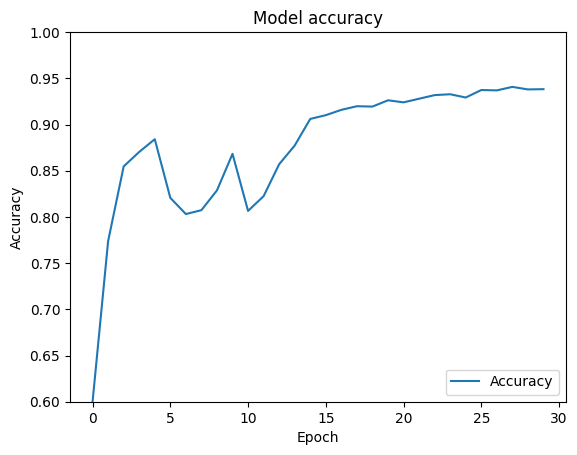

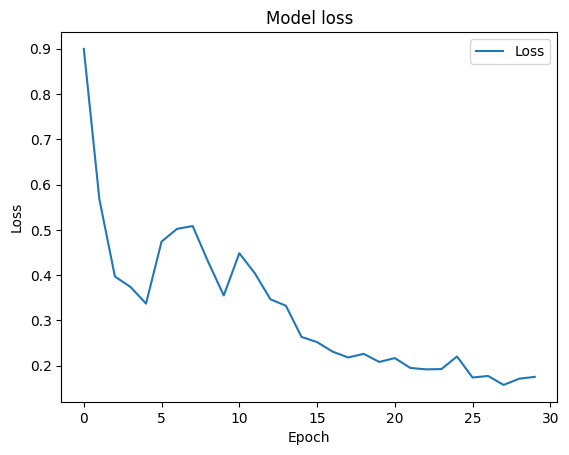

In [ ]:
plt.plot(historia.history['accuracy'], label='Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)

plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:

directory = '/content/drive/MyDrive/pruebas/Testing'

files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

num_classes = 5
files_per_class = cantidadFiles // num_classes


sequence_length = 64
sequence_stride = 10

all_windowsT = []
all_labelsT = []


for idx, file in enumerate(files):
    RutaFile = os.path.join(directory, file)

    dataframe = pd.read_json(RutaFile)
    Valores = dataframe.iloc[:, :].values
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)

    Datos = DatosOriNP[0:970]
    Datos = Datos.reshape(-1, 3)

    current_class = idx // files_per_class

    dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=Datos,
        targets=None,
        sequence_length=sequence_length,
        sequence_stride=sequence_stride,
        batch_size=32,
    )

    X_windowsT = np.concatenate([x.numpy() for x in dataset], axis=0)

    labelsT = np.full((X_windowsT.shape[0],), current_class)

    all_windowsT.append(X_windowsT)
    all_labelsT.append(labelsT)

all_windowsT = np.vstack(all_windowsT)
all_labelsT = np.concatenate(all_labelsT)

print(f"Forma de las ventanas: {all_windowsT.shape}")
print(f"Forma de las etiquetas: {all_labelsT.shape}")

Forma de las ventanas: (4095, 64, 3)
Forma de las etiquetas: (4095,)


In [ ]:
predicciones = modelo_transformer.predict(all_windowsT,batch_size=4095)
clases_predichas = np.argmax(predicciones, axis=1)

print(clases_predichas.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(4095,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = all_labelsT

y_pred = clases_predichas

matriz_confusion = confusion_matrix(y_true, y_pred)

print("Matriz de Confusión:")
print(matriz_confusion)


Matriz de Confusión:
[[677  13   0 129   0]
 [  1 744   0  74   0]
 [  0   0 819   0   0]
 [ 14   9   0 796   0]
 [  0   5   0  13 801]]


In [ ]:
print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       819
           1       0.96      0.91      0.94       819
           2       1.00      1.00      1.00       819
           3       0.79      0.97      0.87       819
           4       1.00      0.98      0.99       819

    accuracy                           0.94      4095
   macro avg       0.95      0.94      0.94      4095
weighted avg       0.95      0.94      0.94      4095



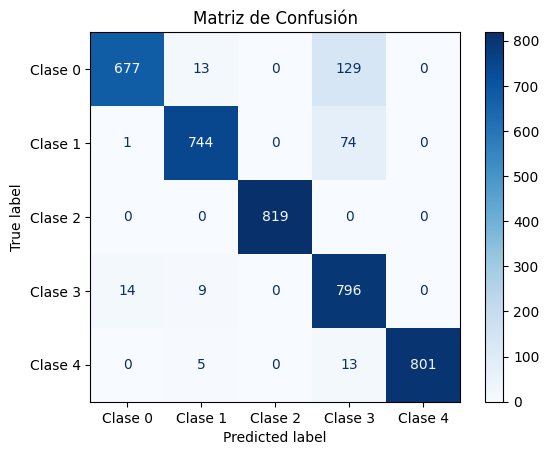

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'])

disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score

recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9370
Recall: 0.936996336996337
F1-score: 0.9380606962924186


# Deploy

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo_transformer)
tflite_model = converter.convert()

with open("transformer.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp6oib7say'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  134382139385536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379753073904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379770690928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379752434576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379770690400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379770845088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379770843504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379770841216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379752839248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379753065456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134379770680720: Ten

In [ ]:
!python -m pip install edgeimpulse

In [ ]:
import edgeimpulse as ei
ei.API_KEY = "ei_xxxxxxxxx"

download_dir = "./"
deploy_filename = "CNN_model_3.zip"
deploy_bytes = None

try:
  deploy_bytes = ei.model.deploy(tflite_model, model_output_type= ei.model.output_type.Classification(),deploy_target="arduino")

except Exception as e:
  print(f"could not deploy model: {e}")

if deploy_bytes is not None:
  with open(deploy_filename, "wb") as f:
    f.write(deploy_bytes.getvalue())